<a href="https://colab.research.google.com/github/ricardomj0499/IA-Investgacion-DBSCAN/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigación IA
# DBSCAN Clustering o Density-Based Spatial Clustering of Applications with Noise
# Ricardo Murillo Jiménez 2018173697
# Ronald Esquivel López 2018093269

# ¿Qué tipo de algoritmo es el DBSCAN dentro del Machine Learning?

Dentro de lo que es el mundo del Machine Learning, existen muchos algoritmos, por lo que estos se pueden separar, en varias 'familias'; como se puede observar en la imagen 1.

El DBSCAN cae dentro del tipo Clustering Que a la vez es un algoritmo no supervisado.


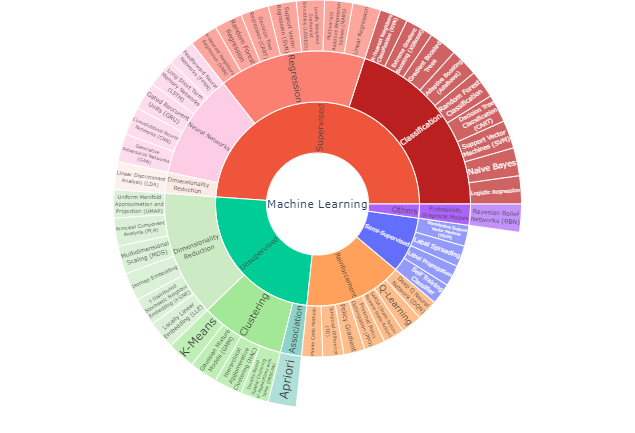

Imagen obtenida de: [9]

# ¿Qué es el clustering?

En este caso el clustering [6], se ve como un método de aprendizaje no supervisado en el cual se dividen los datos en varios grupos, lotes o  clusters. Estos grupos se caracterizan porque sus elementos poseen propiedades similares y a su vez, características que en cierta manera, los separa de otros grupos. Cada cluster, se verá separado de otros por espacios de baja densidad.

## Visualización.

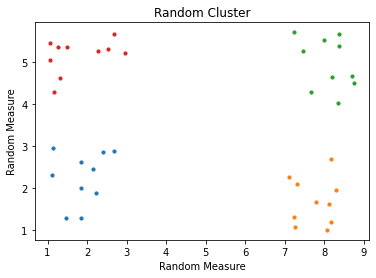

In [ ]:
import matplotlib.pyplot as plt
import random

def gen_range(x1,x2, cant):
    lista = []
    for x in range(cant):
        lista.append(random.uniform(x1, x2))
    return lista

def draw_multiple_points():
    A1 = gen_range(1,3,10)
    A2 = gen_range(1,3,10)
    B1 = gen_range(7,9,10)
    B2 = gen_range(1,3,10)
    C1 = gen_range(7,9,10)
    C2 = gen_range(4,6,10)
    D1 = gen_range(1,3,10)
    D2 = gen_range(4,6,10)
    # Draw point based on above x, y axis values.
    plt.scatter(A1, A2, s=10)
    plt.scatter(B1, B2, s=10)
    plt.scatter(C1, C2, s=10)
    plt.scatter(D1, D2, s=10)
    # Set titulo
    plt.title("Random Cluster")
    # Set etiquetas
    plt.xlabel("Random Measure")
    plt.ylabel("Random Measure")
    plt.show()

draw_multiple_points()

## Tipos de clustering



Según la forma en la que se creen los clusters, estos se pueden separar en varias categorías [9]:

* Centroid-base: O basado en centroides, usa la distancia euclidiana en cada punto de datos para asignar el cluster más cercano. **K-Means**

* Connectivity-based: O clustering basado en conectividad; Acá se asume que los puntos que estén más cercanos están más relacionados que los puntos alejados.**Hierarchical Agglomerative Clustering (HAC)**

* Density-based: Basados en densidad. Define los clusters o grupos basados en regiones de densidad que se separan por regiones de menor densidad.**DBSCAN**

*  Distribution-based: O basados en distribución; asume la existencia de un número especificado de distribuciones. En la que cada distribución posee su propia media, varianza y covarianza. **Gaussian Mixture Models (GMM)**


# ¿Qué es la densidad?

Para entender mejor el algoritmo, hay que saber que es la densidad. Básicamente se entiende como la cantidad de materia en una unidad de espacio.

Bajo esta idea es que funciona el DBSCAN para hacer los grupos de puntos de datos del conjunto de datos.

# Parametros del Algoritmo

Este algoritmo corre bajo la premisa de tan solo 2 simples parámetros [8]:

* Epsilon (ε de ahora en adelante): Es una medida de los grupos o clusters. Se define como el radio del círculo que se forma alrededor de un punto, y que generará un vecindario.

* mínimo de puntos (min_points de ahora en adelante): Es la cantidad mínima de puntos de datos pertenecientes al conjunto que se ocupan para crear un clúster


Notas:
* Densidad: número de puntos en un radio especifico(ε)
* Neighbourhood-Vecindario: Se define como un círculo de radio ε alrededor de un punto *p* en el conjunto de datos. $ N_ε : {q|d(p,q) <= ε } $

## Density Reachability and Density Connectivity


Para entender mejor los parámetros anteriores podemos ver dos conceptos conocidos como:
Density Reachability and Density Connectivity

* Reachability: En términos de densidad establece que un punto es alcanzable desde otro punto, sí está dentro de una distancia particular de este. Siendo esta distancia, ε.

* Connectivity: Define si 2 puntos de datos, pertenecen al mismo clúster o no. Se usa la propiedad de transitividad para saber si están en el clúster o no.

## ¿Como seleccionar los parametros?


La escogencia de parámetros para este tipo de algoritmos, ha sido siempre un dolor de cabeza[12], debido a que pequeños cambios afectan grandemente la salida del algoritmo, por lo que nunca se sabe realmente cuáles son los parámetros correctos desde un principio.

Épsilon: Para la escogencia del valor ε, usualmente se elige usando el K-distance graph. Básicamente funciona obteniendo la distancia promedio entre todos los puntos y sus *k* vecinos más cercanos; donde *k* va a ser la cantidad de puntos mínimos elegida. 

Después se ordenan de mayor a menor en una gráfica, y el ε puede ser determinado por el valor en el que la gráfica llega a su máxima curvatura.

---

-Mínimos puntos: Usualmente para el DBSCAN se define el mínimo de puntos basado en la dimensionalidad del conjunto de datos. Definiendo así: min_points = D+1 o min_points = 2*D; donde D es la dimensionalidad de los datos.

Es Importante notar que los puntos mínimos no es recomendable definirlos como 1, ya que esto significaría que cada punto, es su propio clúster; ni 2, ya que sería un resultado parecido al clustering jerárquico.

Sin embargo, muchas veces es recomendable elegir números más grandes sí el conjunto de datos tiene muchos datos, o mucho ruido.


# Representación de puntos en el algoritmo

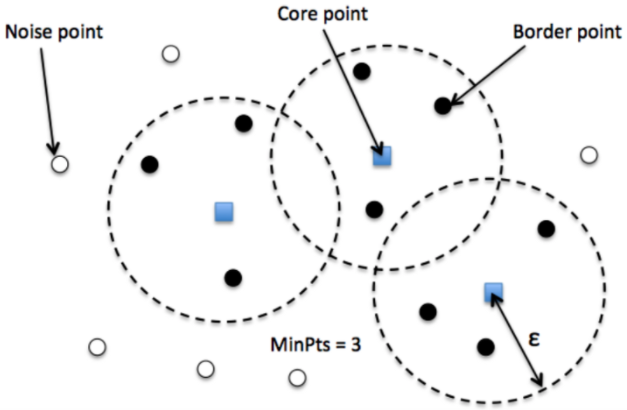

Imagen obtenida de: [4]

Core o punto núcleo — Es un punto que tiene al menos un número mínimo de puntos en su vecindario de radio ε.

Border o punto fronterizo — Tiene menos puntos que la cantidad mínima necesaria para crear un clúster, sin embargo pertenece a algún vecindario de un punto núcleo. 

Noise o punto de ruido — Es un punto que no es Core ni Border. Tiene menos de min_points dentro de su radio.

# ¿Por qué DBSCAN frente a otros algoritmos?

La principal ventaja de este algoritmo es la de que no necesita un número anteriormente especificado para la cantidad de clusters a crear[11]. Estos se crearán según los parámetros y la distribución que los datos sigan.

No fuerza a los puntos considerados como ruido, a pertenecer a un cluster, como si lo hacen algunos otros algoritmos de este tipo.

Todo lo que necesitamos en una función para calcular la distancia entre valores de puntos dados, y un de guía para poder calcular la distancia que se considere correcta.

Otra ventaja, es que produce resultados más "razonables" que algoritmos hermanos a lo largo de muchas distribuciones distintas[4].

## Puntos en contra



No es muy efectivo cuando los clusters tiene densidades muy variables Además de que sí la dimensionalidad es muy alta, determinar la distancia entre los puntos y demás, es una tarea muy demandante.


# Como funciona el algoritmo DBSCAN clustering?

DBSCAN trabaja en la idea de que si un punto en particular pertenece a un cluster, debería estar cerca de un montón de otros puntos en ese cluster.

Ahora bien, los pasos para lograr completar nuestro algoritmo de DBSCAN; son los siguientes:
* Se selecciona un punto arbitrario del conjunto de datos; sí cumple con la cantidad mínima de puntos requeridos, se forma un nuevo cluster, con este punto como core. En el caso de que no cumpliera los requisitos de puntos mínimos, se marca este punto como ruido, y se procede a buscar otro punto el cual no haya sido visitado.

* Después cada punto perteneciente al vecindario del anterior punto elejido es evaluado para determinar sí tiene min_points dentro de su radio. Sí los tiene, se convierte en un punto núcleo y se expande el clúster de datos, pero si no, pasa a ser un punto fronterizo. 

* Se repite el punto anterior hasta que no se encuentran más core points y el cluster se rodea de puntos fronterizos. En este caso, el algoritmo vuelve al punto uno, visitando un punto no visitado y verificando la condición, dando inicio a otro clúster.

* Se repite este proceso hasta que no hayan más puntos sin visitar.



```
params = (D:dataset, eps:epsilon, min_points:cantidad minima de puntos)

   C = 0
   para cada punto P no visitado en el dataset D:
      marque P como visitado
      N = getNeighbors (P, eps){
      # Para obtener la distancia, se utiliza la distancia euclideana
      if sizeof(N) < min_points
         mark P as NOISE
      else
         C = next cluster
         growCluster(P, N, C, eps, min_points)
 
growCluster(P, N, C, eps, min_points)
   añadir P al cluster C
   para cada punto P' en N
      si P' no está visitado
         marcar P' como visitado
         N' = getNeighbors(P', eps)
         si sizeof(N') >= min_points
            N = N se une con N'
      si P' no es aún un miembro de algún cluster
         añadir P' al cluster C
```


## Distancia Euclidiana

Dentro de todo el algoritmo, las distancias entre cada uno de los puntos es algo fundamental; ya que esta es la que marca si x punto va a ser parte de algún vecindario o cluster.

Así la distancia Euclideana (d) entre dos puntos A y B, se define como:

A = (p1, p2)

B = (q1, q2)

$d =\sqrt{ (p_1 - q_1)^2 + (p_2 - q_2)^2 }$

Sin embargo, está se usa solamente cuando manejamos 2 dimensiones

Podemos generalizar a n dimensiones de la siguiente manera:

$d = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2 }$

Donde n es el número de dimensiones y $p_i$,$q_i$ son puntos de datos

# Ejemplo Práctico

## Primer Ejemplo

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from pandas import DataFrame


In [ ]:
# make_blobs() puede ser usada para generar grupos de puntos con una distribución Gausiana
# Con sus parámetros controlamos cuantos puntos, de manchas;
# retorna Xndarray de la forma (n_samples, n_features)
# y las etiquetas de pertenencia al cluster de cada muestra
X, _ = make_blobs(n_samples = 500, centers = 4, n_features = 2) 

Y, _ = make_blobs(n_samples = 5000, centers = 6, n_features = 2)

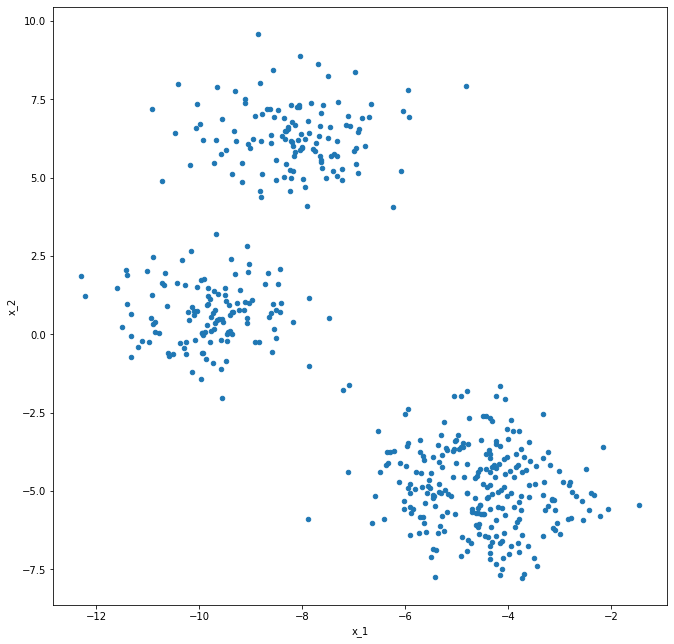

In [ ]:
df1 = DataFrame(dict(x=X[:,0], y=X[:,1]))
fig1, ax1 = plt.subplots(figsize=(11,11))
df1.plot(ax=ax1, kind='scatter', x='x', y='y')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

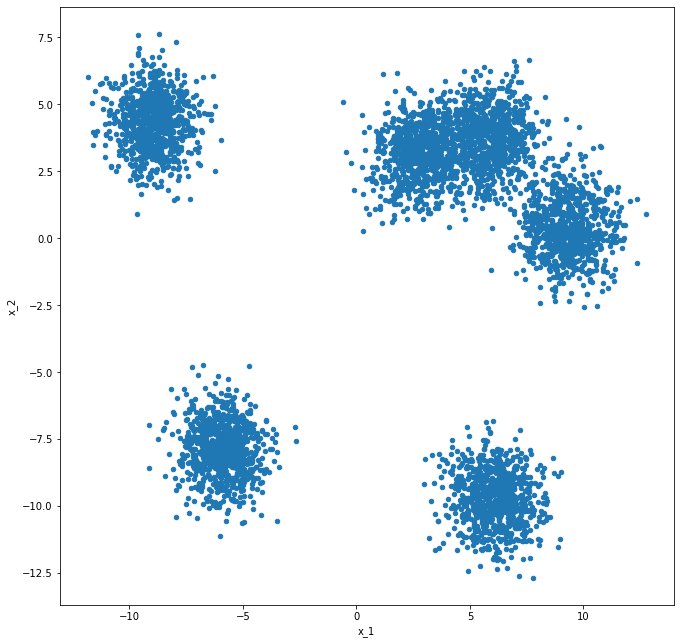

In [ ]:
df2 = DataFrame(dict(x=Y[:,0], y=Y[:,1]))
fig2, ax2 = plt.subplots(figsize=(11,11))
df2.plot(ax=ax2, kind='scatter', x='x', y='y')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
clustering1 = DBSCAN(eps = 1, min_samples = 6).fit(X) # Realiza la validación de parámetros y datos; calcula atributos a partir de la entrada. Básicamente entrena el modelo
cluster1 = clustering1.labels_

clustering2 = DBSCAN(eps = 1, min_samples = 6).fit(Y) 
cluster2 = clustering2.labels_

In [ ]:
len(set(cluster1))


4

In [ ]:
len(set(cluster2))

5

In [ ]:
def show_clusters(X, cluster):
  df = DataFrame(dict(x=X[:,0], y=X[:,1], label=cluster))
  colors = {-1: 'red', 0: 'blue', 1:'orange', 2:'green', 3:'yellow', 4:'pink', 5:'purple', 6:'brown', 7:'black', 8:'gray', 9:'lime', 10:'gold', 11:'violet', 12:'darklime', 13:'navy', 14:'magenta', 15: 'cyan'}
  fig, ax = plt.subplots(figsize=(8,8))
  grouped = df.groupby('label')
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.show()

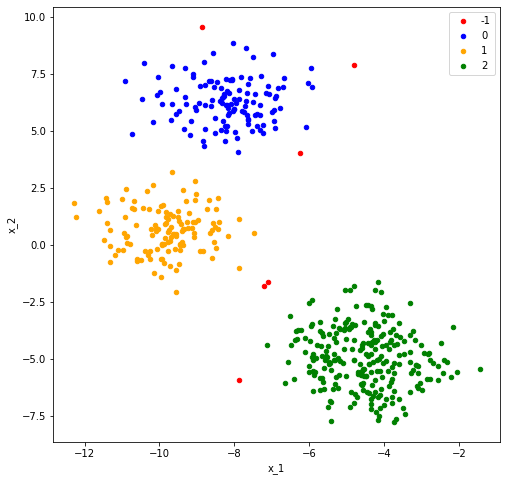

In [ ]:
show_clusters(X, cluster1)

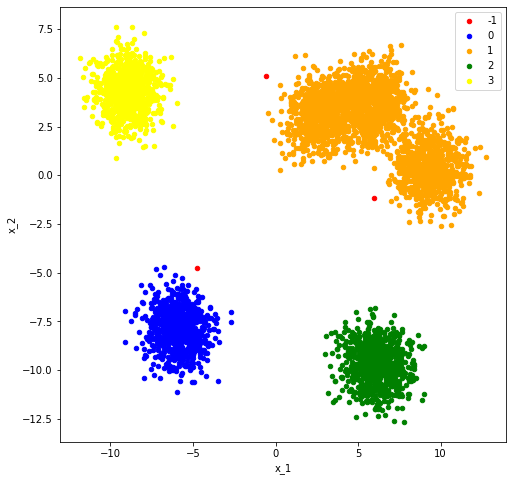

In [ ]:
show_clusters(Y, cluster2)

Optimización  mediante el K-graphs

In [ ]:
from sklearn.neighbors import NearestNeighbors

vecinos = NearestNeighbors(n_neighbors=2)
vec = vecinos.fit(Y)
distances, indices = vec.kneighbors(Y)

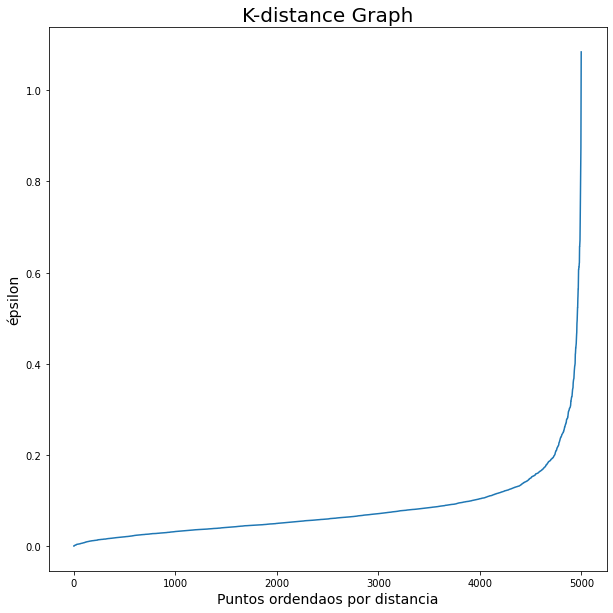

In [ ]:
# Grafica de ordenamiento de promedio de distancias
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Puntos ordendaos por distancia',fontsize=14)
plt.ylabel('épsilon',fontsize=14)
plt.show()

In [ ]:
clustering21 = DBSCAN(eps = 0.3, min_samples = 6).fit(Y)
cluster21 = clustering21.labels_

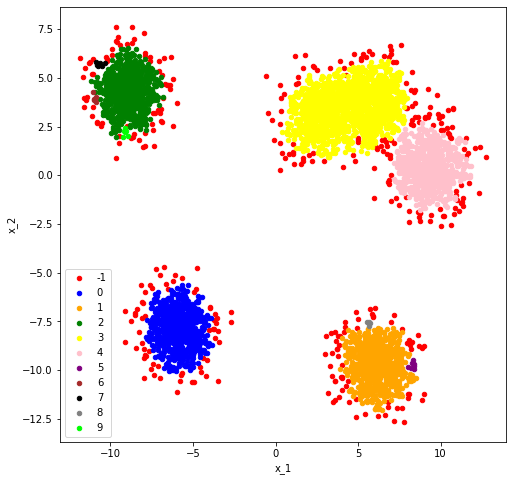

In [ ]:
show_clusters(Y, cluster21)

# Referencias

[1] scikit-learn Dbscan [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

[2] scikit-learn Demo [Online]. Available: https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

[3] scikit-learn Comparision [Online]. Available: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py

[4] N. Singh (2020) [Online]. Available: https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html

[5] F. Berzal (2020) [Online]. Available: https://elvex.ugr.es/idbis/dm/slides/43%20Clustering%20-%20Density.pdf

[6] Geek For Geeks [Online]. Available: https://www.geeksforgeeks.org/dbscan-clustering-in-ml-density-based-clustering/

[7] A. Sharma (2020, Sept 8) [Online]. Available: https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/

[8] S. Dhanya (2021, Jun 1) [Online]. Available: https://www.analyticsvidhya.com/blog/2021/06/understand-the-dbscan-clustering-algorithm/

[9] S. Dobilas (2021, Jun 12) [Online]. Available: https://towardsdatascience.com/dbscan-clustering-algorithm-how-to-build-powerful-density-based-models-21d9961c4cec

[10] J. Gao [Online]. Available: https://cse.buffalo.edu/~jing/cse601/fa12/materials/clustering_density.pdf

[11] digital vidya [Online]. Available: https://www.digitalvidya.com/blog/the-top-5-clustering-algorithms-data-scientists-should-know/

[12] T. Mullin (2020, Jul 09) [Online]. Available: https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd
